In [49]:
# Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [23]:
# Reading the data 

data = pd.read_csv('temperature.csv')

In [24]:
# data check 

data.head()

,Unnamed: 0,longitude,latitude,1,2,3,4,5,6,7,8,9,10,11,12
0,79669,138.75,-4.75,28.5,28.7,28.5,30.2,29.9,28.8,27.3,28.5,28.4,28.4,29.2,29.0
1,79091,136.75,-14.25,29.4,29.8,29.0,29.7,28.2,26.0,23.9,26.0,26.4,28.3,29.8,30.2
2,22723,-57.75,-19.75,28.8,29.0,28.2,25.5,23.6,22.6,24.7,25.4,26.6,27.7,28.1,28.1
3,40355,22.75,-18.25,25.7,25.6,25.6,24.9,21.3,18.0,17.7,21.0,25.1,28.7,27.7,26.1
4,17837,-71.75,-40.25,10.9,10.0,7.9,5.3,2.8,1.9,-0.2,-0.2,1.4,3.6,6.5,8.1


 Create a scatterplot of latitude and longitude of the 2000 locations (using a natural choice of which variable to assign to the x-axis.)

 Calculate the minimum and  maximum latitudes in the dataset and make a plot of the marginal distribution of latitude.
 
 
 Does the distribution of locations appear to be a random sample of earth’s spherical surface?

<Axes: xlabel='longitude', ylabel='latitude'>

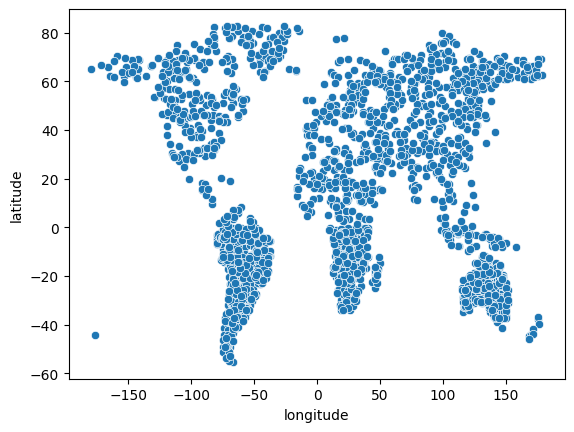

In [25]:
# creating a scatter plot of latitude vs longitude

sns.scatterplot(x = 'longitude', y = 'latitude', data = data)

The minimum latitude is: -55.25
The maximum longitude is: 82.75


<Axes: xlabel='latitude', ylabel='Count'>

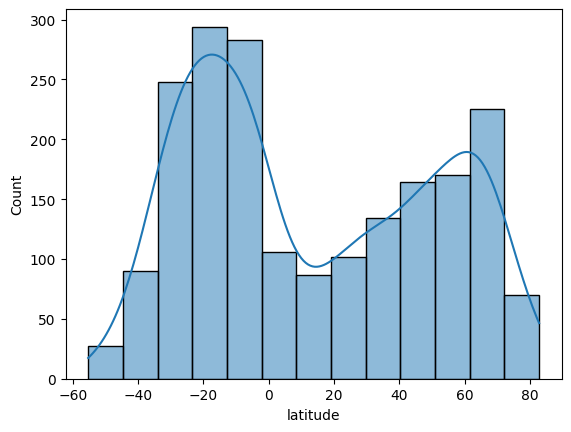

In [26]:
# Finding the maximum and minimum latitude and longitude

min_latitude = data['latitude'].min()
max_latitude = data['latitude'].max()

print('The minimum latitude is:', min_latitude)
print('The maximum longitude is:', max_latitude)

# The marginal distribution of the latitude

sns.histplot(data['latitude'], kde = True)

 Make scatterplots of the latitude and temperature data and compute the correlation  separately for January and July. Is there a natural justification to choose one variable for the x-axis and the other for the y-axis? Why?

The correlation between latitude and temperature in 1 is: -0.8808243838931636
The correlation between latitude and temperature in 7 is: -0.09081110315246942


np.float64(-0.09081110315246942)

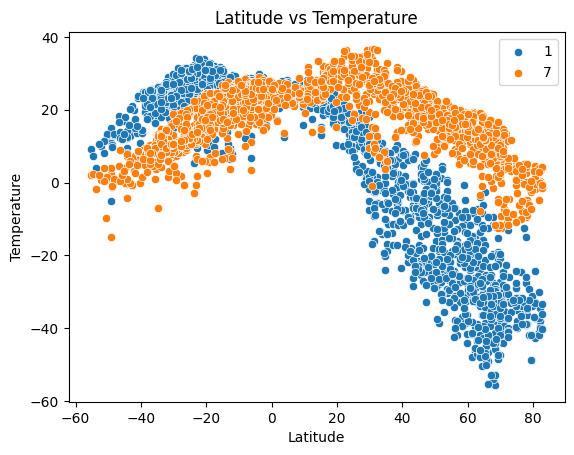

In [38]:
columns_list = ['latitude' , '1']


def latitude_vs_temp(df , month):
    columns_list = ['latitude' , month]
    df_month = df[columns_list]
    sns.scatterplot(x='latitude', y=month, data=df_month, label=month)
    plt.legend()
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.title('Latitude vs Temperature')
    correlation = np.corrcoef(df_month['latitude'], df_month[month])[0, 1]
    print('The correlation between latitude and temperature in', month, 'is:', correlation)
    return correlation

latitude_vs_temp(data, '1')
latitude_vs_temp(data, '7')

Compute the correlation between latitude and temperature in July for the locations in the southern hemisphere (latitude < 0). Plot scatterplots and the linear MMSE  estimator and corresponding residuals.

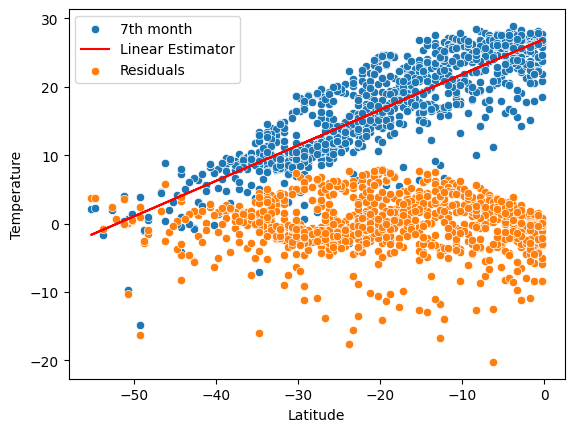

In [61]:
# adding northern and southern hemisphere rules 

conditions = [data['latitude'] < 0, data['latitude'] > 0]
choices = ['Southern Hemisphere', 'Northern Hemisphere']
data['Hemisphere'] = np.select(conditions, choices,'NA')

# compute correlation for a hemisphere 

def latitude_vs_temp_hemisphere(df , month, hemisphere):
    df_month = df[df['Hemisphere'] == hemisphere]
    columns_list = ['latitude' , month]
    df_month = df_month[columns_list]
    
    # scatter plot of latitude vs temperature
    sns.scatterplot(x='latitude', y=month, data=df_month, label=month)
    plt.legend()
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    correlation = np.corrcoef(df_month['latitude'], df_month[month])[0, 1]
    print(f'The correlation between latitude and temperature in {month} and {hemisphere} is {correlation}')
    #return correlation

# compute the linear estimator for latitude vs temperature in the northern hemisphere

chosen_hemisphere = 'Southern Hemisphere'
chosen_month = '7'

model = LinearRegression()
model.fit(data[data['Hemisphere'] == chosen_hemisphere][['latitude']], data[data['Hemisphere'] == chosen_hemisphere][chosen_month])
slope = model.coef_[0]
intercept = model.intercept_
y_hat = slope * data[data['Hemisphere'] == chosen_hemisphere]['latitude'] + intercept
residuals = data[data['Hemisphere'] == chosen_hemisphere][chosen_month] - y_hat

# scatter plot of latitude vs temperature + linear estimator

sns.scatterplot(x='latitude', y=chosen_month, data=data[data['Hemisphere'] == chosen_hemisphere], label=f'{chosen_month}th month')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.plot(data[data['Hemisphere'] == chosen_hemisphere]['latitude'], y_hat, color='red',label = 'Linear Estimator')
sns.scatterplot(x='latitude', y=residuals, data=data[data['Hemisphere'] == chosen_hemisphere], label='Residuals')
plt.legend()

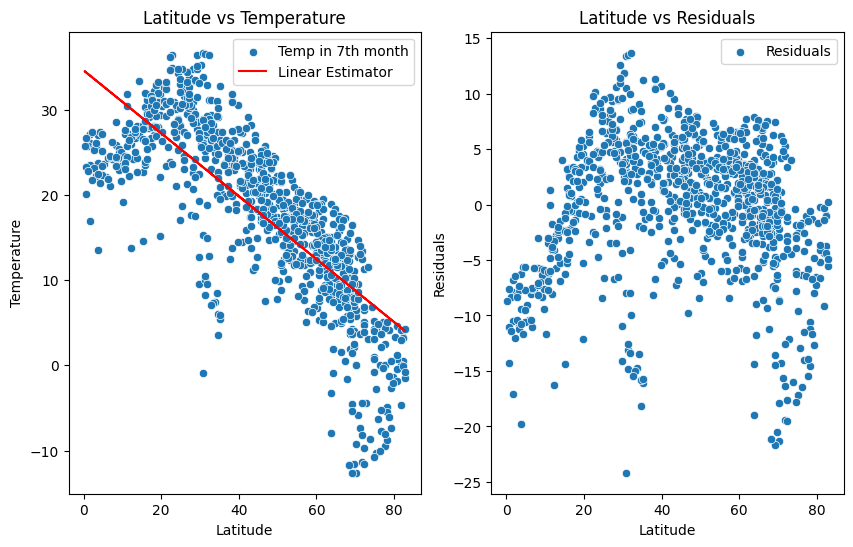

In [67]:
chosen_hemisphere = 'Northern Hemisphere'
chosen_month = '7'

model = LinearRegression()
model.fit(data[data['Hemisphere'] == chosen_hemisphere][['latitude']], data[data['Hemisphere'] == chosen_hemisphere][chosen_month])
slope = model.coef_[0]
intercept = model.intercept_
y_hat = slope * data[data['Hemisphere'] == chosen_hemisphere]['latitude'] + intercept
residuals = data[data['Hemisphere'] == chosen_hemisphere][chosen_month] - y_hat


# scatter plot of latitude vs temperature + linear estimator

fig , ax = plt.subplots(1,2,figsize=(10, 6))


sns.scatterplot(x='latitude', y=chosen_month, data=data[data['Hemisphere'] == chosen_hemisphere], label=f'Temp in {chosen_month}th month', ax=ax[0])
ax[0].title.set_text('Latitude vs Temperature')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Temperature')
ax[0].plot(data[data['Hemisphere'] == chosen_hemisphere]['latitude'], y_hat, color='red', label='Linear Estimator')
ax[0].legend()

sns.scatterplot(x='latitude', y=residuals, data=data[data['Hemisphere'] == chosen_hemisphere], label='Residuals', ax=ax[1])
ax[1].title.set_text('Latitude vs Residuals')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Residuals')
ax[1].legend()

